## Distillation and tensors

1. The idea of distillation 

Teacher models:
- Teacher model goes from 1,2,3,4
- Student model moves from 1 to 4 to 8


The goal is to rebuild everything again from scratch.

# Matrix multiplication

In [1]:
from pathlib import Path
import pickle, gzip, math, os, time, shutil, matplotlib as mpl, matplotlib.pyplot as plt

In [13]:
MNIST_URL = "https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true"

In [9]:
path_data = Path('data')
path_data.mkdir(exist_ok = True)
path_gz = path_data/'mnist.pkl.gz'

In [15]:
!ls -l data

total 16656
-rw-r--r-- 1 kyan kyan 17051982 Apr  1 23:47 mnist.pkl.gz


In [16]:
with gzip.open(path_gz, 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

In [30]:
lst1 = list(x_train[0])
vals = lst1[200:210]

In [22]:
len(lst1) # which corresponds to 28x 28 images

784

In [23]:
#We want a function that can turn 784 numbers into 28x28 images
def chunks(x, sz):
    for i in range(0, len(x), sz):
        yield x[i:i+sz] #yield creates an interator, that returns the next thing

In [43]:
val_iter = chunks(vals,5)

In [46]:
next(val_iter) # iterates through the list

StopIteration: 

In [47]:
list(chunks(vals,5)) 

[[0.0, 0.0, 0.0, 0.19140625, 0.9296875],
 [0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]]

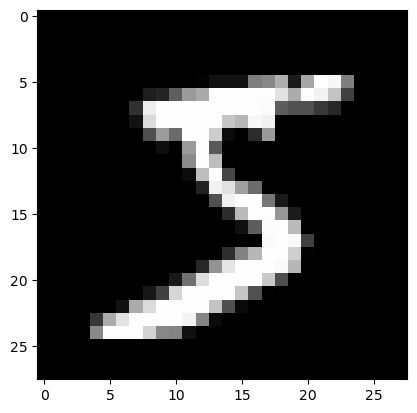

In [49]:
mpl.rcParams['image.cmap'] = 'gray'
plt.imshow(list(chunks(lst1,28)))

## Iterators 

In [50]:
from itertools import islice

In [53]:
it = iter(vals)
islice_it = islice(it,5)

In [54]:
list(islice(it,5)) #grabs the first n things from an iterable

[0.0, 0.0, 0.0, 0.19140625, 0.9296875]

In [56]:
# we can continually call this to return the image
it = iter(lst1) # we can pass a list or an callable
img = list(iter(lambda: list(islice(it, 28)), []))

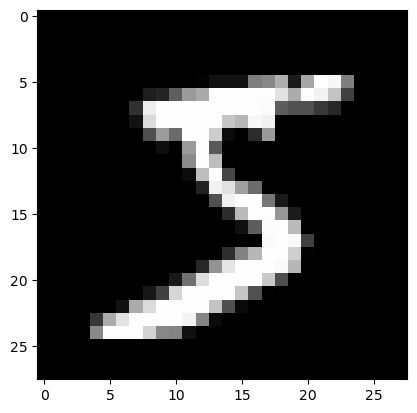

In [58]:
plt.imshow(img)

## Matrix and Tensor

In [61]:
img[20][19]

0.0

In [62]:
class Matrix:
    def __init__(self, xs): 
        self.xs = xs
    def __getitem__(self, idxs):
        return self.xs[idxs[0]][idxs[1]]

In [66]:
m = Matrix(img)
m[20,15] # allows us to index into this

0.98828125

In [63]:
import torch

In [64]:
from torch import tensor

In [70]:
tens = tensor(img)
tens[20,15]

tensor(0.9883)

Converting all lists into tensors from our data

In [71]:
x_train, y_train, x_valid, y_valid = map(tensor, (x_train, y_train, x_valid, y_valid))

In [72]:
x_train.shape

torch.Size([50000, 784])

In [73]:
x_train.type

<function Tensor.type>

In [81]:
imgs = x_train.reshape((-1,28,28))  # rank 3 tensor
imgs.shape#-1 indicates fill in

torch.Size([50000, 28, 28])

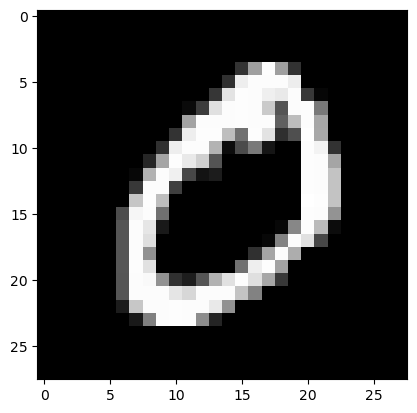

In [79]:
plt.imshow(imgs[1])

In [82]:
n, c = x_train.shape
y_train, y_train.shape

(tensor([5, 0, 4,  ..., 8, 4, 8]), torch.Size([50000]))

## Random Number Generator

Based on the Wichmann Hill algorithm used before Python 2.3

In [83]:
rnd_state = None
def seed(a):
    global rnd_state
    a, x = divmod(a, 30268)
    a, y = divmod(a, 30306)
    a, z = divmod(a, 30322)
    rnd_state = int(x)+1, int(y)+1, int(z)+1

In [86]:
seed(4242424242424242)
rnd_state

(17039, 20046, 15950)

In [ ]:
def rand():
    global rnd_state
    x, y, z = rnd_state
## In pytorch and numpy the random is copied in each fork.

In [92]:
if os.fork():
    print(f'In parent: {torch.rand(1)}')
else:
    print(f'In child: {torch.rand(1)}')
    os._exit(os.EX_OK)

In parent: tensor([0.9485])
In child: tensor([0.9485])


In [94]:
from random import random
if os.fork():
    print(f'In parent: {random()}')
else:
    print(f'In child: {random()}')
    os._exit(os.EX_OK)

In parent: 0.10749778844220848
In child: 0.6747152251155981


## Reading Papers

Relevant Paper:
https://arxiv.org/pdf/2210.11427.pdf


Key Ideas:
- The goal is not to understand every word, just the basic idea
- Match the code w/ the goal and replicate yourself



Abstract:
- Semantic image editing: edit an image based on a text query 
- The generated image should be as similar to the image as possible
- Their key innovation is to generate a mask

Introduction:
- conditioning a diffusion model can be done on the image and random noise

Related Work:
- skim / skip over

Background:
- Reminder of what you're supposed to know, is often written last



$$
\newcommand{\alphabar}{\bar{\alpha}}
\newcommand{\x}{\mathbf{x}}
\newcommand{\y}{\mathbf{y}}
\newcommand{\epsi}{{\epsilon}}
\newcommand{\gaussian}{\mathcal{N}(\mathbf{0}, \mathbf{I})}
\newcommand{\ours}{\textsc{DiffEdit}\xspace}
\mathcal{L} = \displaystyle \mathbb{E}_{\x_0, t, \epsi} \Vert \epsi - \epsilon_\theta(\x_t, t) \Vert_2^2,$$

This is the l2 norm (root of sum of squares), squared = 0

- The Loss is the expected value of the loss minus the loss estimator (in other words, MSE)

## TO BE FINISHED Lesson 11

# Matrix and Tensor

In [95]:
torch.manual_seed(42)

We will create a simple matrix, consisting of 5 x 784, and then we will have 784 x 10 weights:

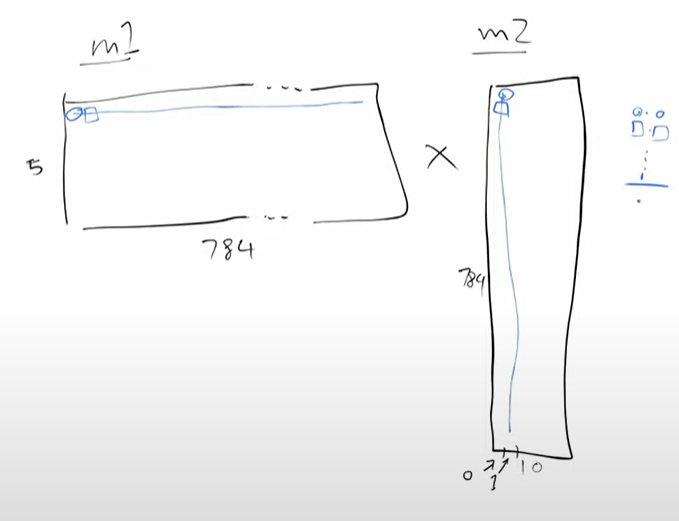

In [96]:
weights = torch.randn(784,10)
bias = torch.zeros(10)
m1 = x_valid[:5]
m2 = weights

In [97]:
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [98]:
a_rows, a_cols = m1.shape
b_rows, b_cols = m2.shape

t1 = torch.zeros(a_rows, b_cols)
t1.shape

torch.set_printoptions(precision=2, linewidth=100, sci_mode=False)

# Matrix multiplication step

for i in range(a_rows): # for every row in a
    for j in range(b_cols): # for every column in b
        for k in range(a_cols):
            t1[i,j] += m1[i,k] * m2[k,j] # we add each element of row a multiplied by column b

In [109]:
t1

tensor([[ -5.28,  10.25,   2.07,   4.31,  -7.91, -10.03,   4.10,   1.87,   2.95,   8.23],
        [  3.70,  11.19,   4.88,  -2.83, -12.34,  -5.00,  -4.03,  -0.12,   2.48,   6.84],
        [ -0.65,   0.96,  13.61,   0.61,  -3.77,  -7.93,   5.29,   8.89,   3.50,   5.30],
        [-18.84,  10.83,   0.32, -10.01,   1.63,  -4.54,  -0.04,  -2.07,   9.84,   8.82],
        [ -8.41,   4.87,   0.95,  13.35, -13.55,  -2.51,   8.70,  -4.11,   1.39,  -2.55]])

In [110]:
def matrix_multiplication(a,b):
    a_rows, a_cols = m1.shape
    b_rows, b_cols = m2.shape

    t1 = torch.zeros(a_rows, b_cols)
    # Matrix multiplication step

    for i in range(a_rows): # for every row in a
        for j in range(b_cols): # for every column in b
            for k in range(a_cols):
                t1[i,j] += m1[i,k] * m2[k,j] # we add each element of row a multiplied by column b

In [112]:
%time _ = matrix_multiplication(m1,m2)
# very slow in pure python

CPU times: user 687 ms, sys: 0 ns, total: 687 ms
Wall time: 686 ms


## Numba

In [117]:
from numba import njit
# this module allows you to write c in python, allowing for speed improvements

In [118]:
@njit
def dot(a,b):
    res = 0
    for i in range(len(a)):
        res += a[i]*b[i]
    return res

In [119]:
from numpy import array

In [121]:
%time dot(array([1,2,3]), array([2,3,4]))

CPU times: user 1.83 s, sys: 294 ms, total: 2.13 s
Wall time: 2.27 s


20

In [123]:
%time dot(array([1,2,3]), array([2,3,4]))
# runs much faster the second time around due to the program being compiled already

CPU times: user 59 µs, sys: 24 µs, total: 83 µs
Wall time: 85.6 µs


20

In [127]:
def fast_mm(a,b):
    a_rows, a_cols = m1.shape
    b_rows, b_cols = m2.shape

    t1 = torch.zeros(a_rows, b_cols)
    # Matrix multiplication step

    for i in range(a_rows): # for every row in a
        for j in range(b_cols): # for every column in b
            t1[i,j] = dot(a[i,:], b[:,j])

In [125]:
m1a, m2a = m1.numpy(), m2.numpy()

In [129]:
%timeit -n 50 fast_mm(m1a, m2a)
# 1000 times faster

523 µs ± 141 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


## Elementwise Operations

In [130]:
a = tensor([10, 6, -4])
b = tensor([2, 8, 7])
a, b

(tensor([10,  6, -4]), tensor([2, 8, 7]))

In [131]:
a < b

tensor([False,  True,  True])

In [133]:
(a<b).float().mean()

tensor(0.67)

In [136]:
m = tensor([[1,2,3],[4,5,6], [7,8,9]])
m #dim 3 tensor

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

### Frobenius norm

 $$\|A\|_{\rm F} = \left(\sum_{i=1}^m \sum_{j=1}^n |a_{ij}|^2\right)^{\frac{1}{2}}$$

In [138]:
sf = (m*m).sum()
sf

tensor(285)

In [139]:
sf.sqrt()

tensor(16.88)

## Broadcasting

In [140]:
a

tensor([10,  6, -4])

In [141]:
a > 0 

tensor([ True,  True, False])

In [144]:
# identical to 
a > torch.zeros(3)

tensor([ True,  True, False])

In [146]:
m*2 # broadcasting across matrix

tensor([[ 2,  4,  6],
        [ 8, 10, 12],
        [14, 16, 18]])

In [147]:
c = tensor([10,20,30]) # can broadcast a vector across a matrix
m + c

tensor([[11, 22, 33],
        [14, 25, 36],
        [17, 28, 39]])

In [148]:
# identical to (not a copy)
t = c.expand_as(m)
t

tensor([[10, 20, 30],
        [10, 20, 30],
        [10, 20, 30]])

In [149]:
m + t

tensor([[11, 22, 33],
        [14, 25, 36],
        [17, 28, 39]])

In [150]:
c.unsqueeze(0)

tensor([[10, 20, 30]])

In [153]:
c[None, :] #identical

tensor([[10, 20, 30]])

In [154]:
c.unsqueeze(1)

tensor([[10],
        [20],
        [30]])

In [157]:
c[: ,None]

tensor([[10],
        [20],
        [30]])

In [159]:
c[None].size()

torch.Size([1, 3])

In [160]:
c[:, None].expand_as(m) 

tensor([[10, 10, 10],
        [20, 20, 20],
        [30, 30, 30]])

In [163]:
m + c[None]

tensor([[11, 22, 33],
        [14, 25, 36],
        [17, 28, 39]])

In [162]:
m + c[:,None]

tensor([[11, 12, 13],
        [24, 25, 26],
        [37, 38, 39]])

In [164]:
# Outer product: 3x 1 x 1x3

c[None] * c[:, None]

tensor([[100, 200, 300],
        [200, 400, 600],
        [300, 600, 900]])

In [166]:
c[None] > c[:, None]

tensor([[False,  True,  True],
        [False, False,  True],
        [False, False, False]])

When operating on two arrays/tensors, Numpy/ Pytorch will compare their shapes element wise. It starts with trailing dimensons and works its way forward. Two dimensons are compatible when:

- they are equal or
- one of them is 1, in which case that dimension is broadcasted to make it the same size

## Matmul with broadcasting

In [167]:
digit = m1[0]
digit.shape, m2.shape

(torch.Size([784]), torch.Size([784, 10]))

In [170]:
digit[:, None].shape

torch.Size([784, 1])

In [171]:
digit[:, None].expand_as(m2).shape

torch.Size([784, 10])

In [176]:
(digit[:, None]*m2).shape

torch.Size([784, 10])

In [180]:
def new_mat_mul(a,b):
    (ar,ac), (br,bc)= a.shape, b.shape
    c = torch.zeros(ar,bc)
    for i in range(ar):
        c[i] = (a[i,:,None] * b).sum(dim = 0)
    return c

In [181]:
%timeit -n 50 new_mat_mul(m1, m2)

284 µs ± 103 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [187]:
m1[1,:].shape #row of 784 value

torch.Size([784])

In [183]:
m1[1,:,None].shape

torch.Size([784, 1])

In [194]:
m1[1,:, None].expand_as(m2).shape

torch.Size([784, 10])

In [185]:
m2.shape

torch.Size([784, 10])

In [195]:
(m1[1,:,None]*m2).shape

# This is element wise multiplication, not matrix multiplication?

torch.Size([784, 10])